In [20]:
# Location-Based Recommendations
# Recommendation systems are widely utilized in different applications for predicting the preference or rating of a user 
# in a product or service. Most likely you have come across or interacted with some type of recommender systems in the past 
# few minutes or hours in your online presence.
# These Recommender systems can be of different types and the most prominent ones include Content-based filtering and Collaborative
# filtering. In this article, we will study location-based recommendations, where we specifically focus on geographic locations to render 
# more relevant recommendations utilizing the location of the users.

# To illustrate the crucial aspects of location-based recommenders we will perform a simple Location-based recommendation using the
#  K-Means algorithm with Yelp Dataset from Kaggle.

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [22]:
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [23]:
df.shape

(192609, 14)

## Exploratory Data Analaysis (EDA)

In [24]:
df['Restaurants'] = df['categories'].str.contains('Restaurants')
df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,False
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True


In [25]:
df_restaurants = df.loc[df.Restaurants == True]
df_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",True
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",True
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",True
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,True


In [26]:
df_restaurants.shape

(59371, 15)

C:\Users\ahmed\anaconda3\envs\MovieSuccess\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


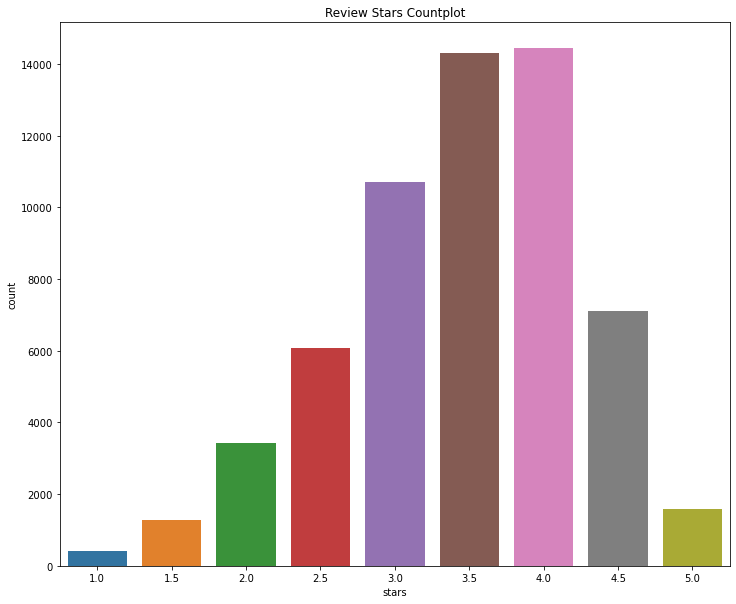

In [27]:

fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(df_restaurants['stars'], ax=ax)
plt.title('Review Stars Countplot')
plt.show()

In [28]:
top_restaurants = df_restaurants.sort_values(by=['review_count', 'stars'], ascending=False)[:20]
top_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
82250,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,3655 Las Vegas Blvd S,Las Vegas,NV,89109,36.112859,-115.172434,4.0,8348,1,"{'Corkage': 'True', 'RestaurantsDelivery': 'Fa...","Food, French, Breakfast & Brunch, Restaurants,...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",True
89206,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.116113,-115.176222,4.0,8339,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Buffets, Sandwiches, Food, Breakf...","{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",True
35199,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3708 Las Vegas Blvd S,Las Vegas,NV,89109,36.109550,-115.176155,3.5,6708,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Buffets, Breakfast & Brunch, Restaurants","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",True
58852,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,3535 Las Vegas Blvd,Las Vegas,NV,89109,36.118181,-115.171580,4.0,5763,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Breakfast & Brunch, Food, Restaurants, America...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True
141820,cYwJA2A6I12KNkm2rtXd5g,Gordon Ramsay BurGR,3667 Las Vegas Blvd S,Las Vegas,NV,89109,36.110724,-115.172169,4.0,5484,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Burgers, American (Traditional)","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",True


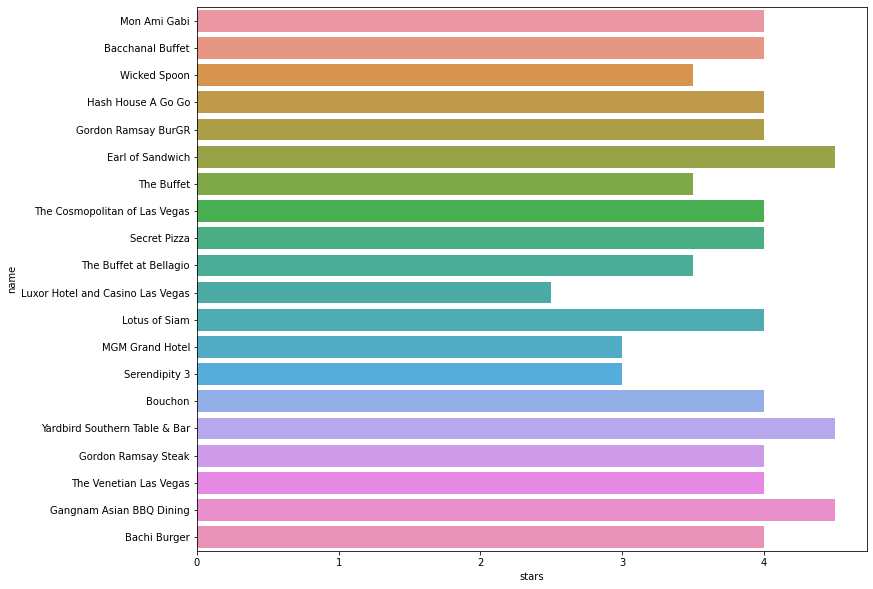

In [29]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x = 'stars', y = 'name', data=top_restaurants, ax= ax);
plt.show()

## K-Means Clustering

### Determing the number of clusters (K)

In [30]:
# Elbow method to determine the number of K in Kmeans Clustering
lasVegas = df_restaurants[df_restaurants.state == 'NV']
coords = lasVegas[['longitude','latitude']]

distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)



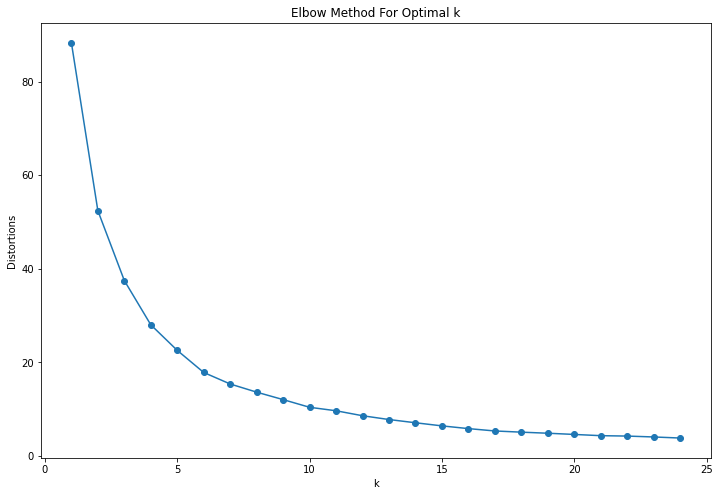

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

Silhoute method


In [32]:
sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

In [33]:
sil

[0.3839118768021234,
 0.36945055010293226,
 0.39701673803630777,
 0.38912280126341076,
 0.4111247630580175,
 0.41825477767116004,
 0.40177004117910126,
 0.4046616513690503,
 0.4123933110495689,
 0.41594352445567234,
 0.4248311606507522,
 0.42572588254928256,
 0.4260408819470866,
 0.4292196467672236,
 0.44123905834914157,
 0.44586195185842936,
 0.44331885154368733,
 0.4400417438704491,
 0.44385666181192407,
 0.42230036835153467,
 0.43921762041964724,
 0.4438659574886868,
 0.4259185399227831,
 0.42709493435756807,
 0.4209222976067435,
 0.426377677871829,
 0.4335266988262277,
 0.43479991788201916,
 0.4369683001416056,
 0.45737860917984585,
 0.4440890175403436,
 0.4380375253195548,
 0.4358611775170727,
 0.44816801717064025,
 0.4425000827720688,
 0.432485174323582,
 0.4315805020392232,
 0.43350127175153147,
 0.44719457237437793,
 0.4439181129592554,
 0.4479781340067729,
 0.438558136393612,
 0.4414789390656387,
 0.44974878416200986,
 0.4396115473400303,
 0.4520484117730127,
 0.45090764821033

### K-Means Clustering

In [34]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

k = 5  silhouette_score  0.38892251510005216


In [35]:
lasVegas['cluster'] = kmeans.predict(lasVegas[['longitude','latitude']])
lasVegas.head()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10724\403706406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasVegas['cluster'] = kmeans.predict(lasVegas[['longitude','latitude']])


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants,cluster
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,True,3
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",True,1
75,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,6125 Spring Mountain Rd,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...","Fast Food, Food, Restaurants, Ice Cream & Froz...",None,True,3
111,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,4343 N Rancho Dr,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,None,"Restaurants, Chinese",None,True,4
135,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Artisan Hotel, 1501 W Sahara Ave",Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"{'RestaurantsAttire': ''dressy'', 'Corkage': '...","Restaurants, Pizza, Italian, American (New)","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",True,3


## Location-Based Recommendation

In [36]:
top_restaurants_lasVegas = lasVegas.sort_values(by=['review_count', 'stars'], ascending=False)
top_restaurants_lasVegas.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants,cluster
82250,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,3655 Las Vegas Blvd S,Las Vegas,NV,89109,36.112859,-115.172434,4.0,8348,1,"{'Corkage': 'True', 'RestaurantsDelivery': 'Fa...","Food, French, Breakfast & Brunch, Restaurants,...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",True,3
89206,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.116113,-115.176222,4.0,8339,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Buffets, Sandwiches, Food, Breakf...","{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",True,3
35199,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3708 Las Vegas Blvd S,Las Vegas,NV,89109,36.109550,-115.176155,3.5,6708,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Buffets, Breakfast & Brunch, Restaurants","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",True,3
58852,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,3535 Las Vegas Blvd,Las Vegas,NV,89109,36.118181,-115.171580,4.0,5763,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Breakfast & Brunch, Food, Restaurants, America...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True,3
141820,cYwJA2A6I12KNkm2rtXd5g,Gordon Ramsay BurGR,3667 Las Vegas Blvd S,Las Vegas,NV,89109,36.110724,-115.172169,4.0,5484,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Burgers, American (Traditional)","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",True,3


In [37]:
def recommend_restaurants(df, longitude, latitude):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print(cluster)
   
    # Get the best restaurant in this cluster
    return  df[df['cluster']==cluster].iloc[0:5][['name', 'latitude','longitude']]
   

In [40]:
recommend_restaurants(top_restaurants_lasVegas, -115.1891691,  36.1017316)
recommend_restaurants(top_restaurants_lasVegas, -115.2798544, 36.0842838) 
recommend_restaurants(top_restaurants_lasVegas, -115.082821, 36.155011)

3
0
1


,name,latitude,longitude
111864,Lotus of Siam,36.143664,-115.141891
79764,Eat.,36.166900,-115.138977
127088,Pizza Rock,36.171618,-115.142267
55675,Carson Kitchen,36.167878,-115.140640
160676,Golden Nugget,36.169781,-115.145534
